Load different libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
import csv

Load the data set (wine). Variable data stores the final data (178 x 13)

In [2]:
my_data = np.genfromtxt('wine_data.csv', delimiter=',')
data = my_data[:,1:]
target= my_data[:,0] # Class of each instance (1, 2 or 3)
print("Size of the data {} ".format(data.shape))

Size of the data (178, 13) 


Draw the data in 3/13 dimensions (Hint: experiment with different combinations of dimensions)

Text(0.5, 0.92, 'Vizualization of the dataset (3 out of 13 dimensions)')

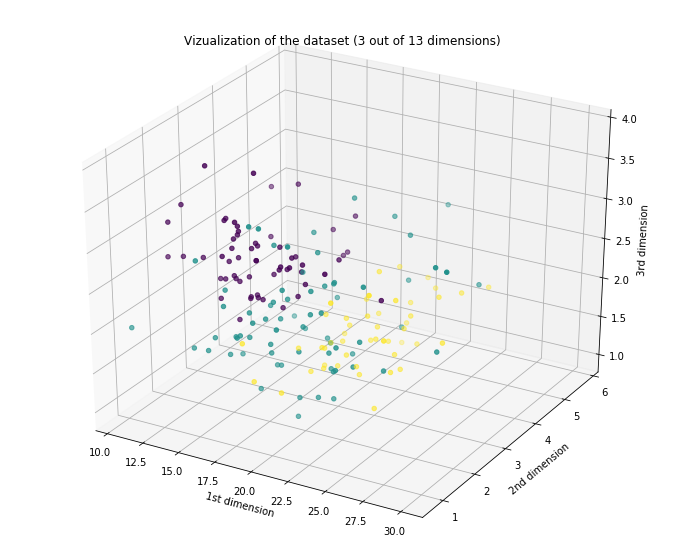

In [3]:
fig1 = plt.figure(1, figsize=(12, 10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(data[:,3],data[:,1],data[:,5], c=target)
ax1.set_xlabel('1st dimension')
ax1.set_ylabel('2nd dimension')
ax1.set_zlabel('3rd dimension')
ax1.set_title("Vizualization of the dataset (3 out of 13 dimensions)")

Performs principal components analysis (PCA) on the $n \times p$ data matrix A (data)
Rows of A correspond to observations (wines), columns to variables.
## TODO: Implement PCA
## Project the data X to the first two and three principal components
## The name of the new data matrices should be 'newData2' and 'newData3'

In [4]:
M = np.mean(data, 0) # compute the mean
C = data - M # subtract the mean (along columns)
W = np.dot(C.T, C) # compute covariance matrix
eigval, eigvec = np.linalg.eig(W) # compute eigenvalues and eigenvectors of covariance matrix
idx = eigval.argsort()[::-1] # Sort eigenvalues
eigvec = eigvec[:,idx] # Sort eigenvectors according to eigenvalues

newData2 = np.dot(C,np.real(eigvec[:,:2])) # Project the data to the new space (2-D)
newData3 = np.dot(C,np.real(eigvec[:,:3])) # Project the data to the new space (3-D)

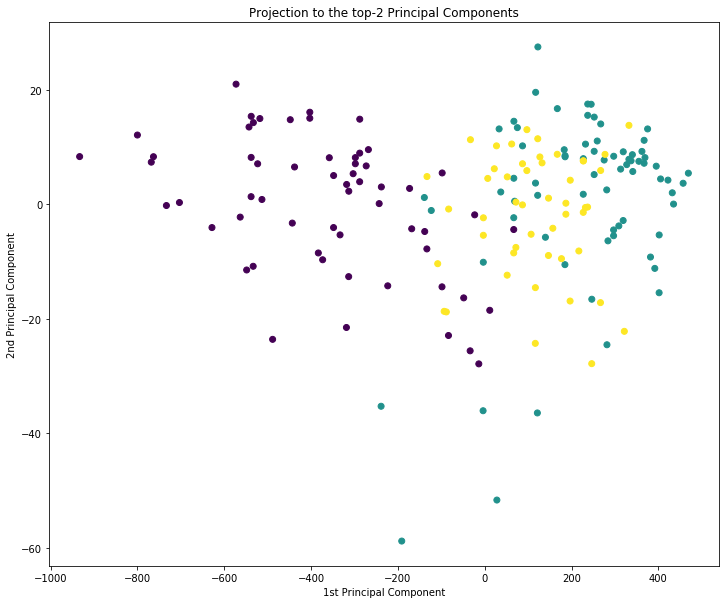

In [5]:

# Plot the first two principal components 
plt.figure(2, figsize=(12, 10))
plt.scatter(newData2[:,0],newData2[:,1], c=target)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title("Projection to the top-2 Principal Components")
plt.draw()  

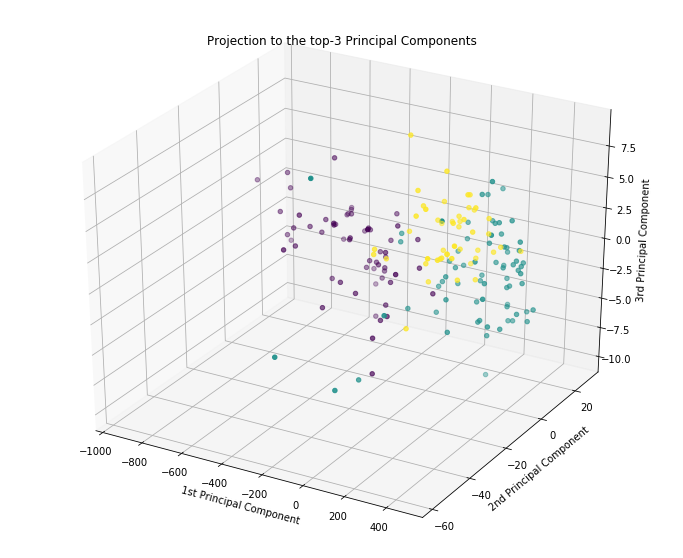

In [6]:
# Plot the first three principal components 
fig = plt.figure(3, figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newData3[:,0],newData3[:,1], newData3[:,2], c=target)
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')
ax.set_title("Projection to the top-3 Principal Components")
plt.show()